# Intro to data science project

## Data 
Truck GPS 1 day
## Objective
1) Carbon emittion volumn in interest areas   

	- Apply ML(K-means) to find routes used by truck

2) Highspeed truck area in the middle of thailand

	- Apply ML (DBSCAN)  to find the high speed area 

3) Lowspeed truck area in the middle of thailand

	- Apply ML (DBSCAN)  to find the low speed area 

In [ ]:
import pandas as pd

df = pd.read_parquet(r'C:\Users\Documents\TruckAnalyticsGPS\Transformed Data\Converted to Parquet\truckdata-00-06.parquet')

# Display the first few rows of the dataframe
df.head()

,unitid,utc_ts,lat,lon,speed,typecode
0,00300170000000T015820450148,2024-10-31 23:58:47,16.397420,102.813911,66,7
1,00300170000000T015820451022,2024-10-31 23:58:55,15.176015,104.843303,0,7
2,00300170000000T015820451233,2024-10-31 23:58:35,14.373698,100.021311,0,7
3,00300170000000T015820710006,2024-10-31 23:58:04,15.249035,100.204625,0,7
4,00300170000000T015820710404,2024-10-31 23:58:14,13.779333,100.686003,0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94548685 entries, 0 to 94548684
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   unitid    object 
 1   utc_ts    object 
 2   lat       float64
 3   lon       float64
 4   speed     int64  
 5   typecode  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.2+ GB


In [4]:
print(df.isnull().sum())

unitid      0
utc_ts      0
lat         0
lon         0
speed       0
typecode    0
dtype: int64


In [5]:
print(df.describe())  # Summary of numeric columns
print(df["typecode"].value_counts())  # Count unique type codes

                lat           lon         speed      typecode
count  9.454868e+07  9.454868e+07  9.454868e+07  9.454868e+07
mean   1.405010e+01  1.009008e+02  1.365022e+01  7.410856e+00
std    2.577866e+00  1.974134e+00  2.345109e+01  7.516979e-01
min   -8.291751e+01 -1.649087e+02  0.000000e+00  5.000000e+00
25%    1.336012e+01  1.000628e+02  0.000000e+00  7.000000e+00
50%    1.403882e+01  1.007142e+02  0.000000e+00  8.000000e+00
75%    1.537633e+01  1.013036e+02  1.800000e+01  8.000000e+00
max    7.956578e+01  1.568705e+02  2.550000e+02  9.000000e+00
typecode
8    44877659
7    38234994
6     7078994
9     2440336
5     1916702
Name: count, dtype: int64


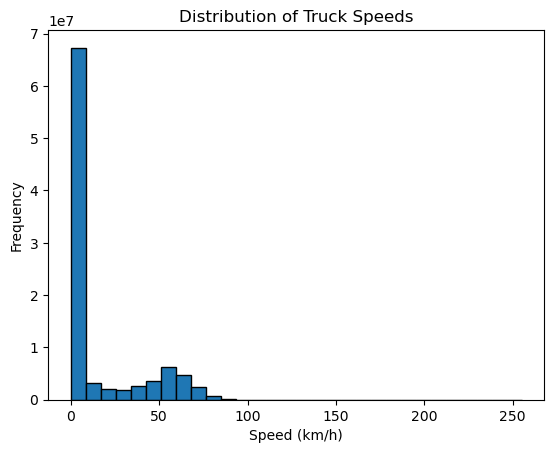

In [6]:
import matplotlib.pyplot as plt

plt.hist(df["speed"], bins=30, edgecolor="black")
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.title("Distribution of Truck Speeds")
plt.show()

In [7]:
# Count rows where speed is greater than 120
high_speed_count = (df["speed"] > 120).sum()
print(f"Total rows where speed > 120: {high_speed_count}")
df_high_speed = df[df["speed"] > 120]
df_high_speed.head()

Total rows where speed > 120: 332


,unitid,utc_ts,lat,lon,speed,typecode
691017,00300170000000T015830332359,2024-11-01 00:01:40,15.557478,100.109223,178,7
694865,00300170000000T015830332359,2024-11-01 00:01:40,15.557478,100.109223,178,7
1219106,174000100000000000000000630,2024-11-01 00:04:57,13.549760,99.694048,123,9
1657195,00300170000000T015830332359,2024-11-01 00:05:36,16.617090,101.813050,143,7
1657588,00300170000000T015830332359,2024-11-01 00:05:36,16.617090,101.813050,143,7


In [7]:
!pip install folium

In [8]:
# Define reasonable lat/lon bounds for Thailand
lat_min, lat_max = 5.5, 20.5    # Thailand spans approx. 5.5°N to 20.5°N
lon_min, lon_max = 97.0, 106.0  # Thailand spans approx. 97°E to 106°E

# Find GPS points outside Thailand's geographic boundary
outliers = df[(df["lat"] < lat_min) | (df["lat"] > lat_max) | 
              (df["lon"] < lon_min) | (df["lon"] > lon_max)]

# Output result
print(f"Total GPS Outliers Outside Thailand: {len(outliers):,}")
outliers.head()


Total GPS Outliers Outside Thailand: 23,252


,unitid,utc_ts,lat,lon,speed,typecode
8135,006002200000000711060010017,2024-10-31 23:59:35,0.00000,0.00000,0,7
9740,006002600000000430062050634,2024-10-31 23:59:34,0.00000,0.00000,0,7
9849,006002600000000708045161093,2024-10-31 23:59:27,0.00000,0.00000,0,7
12974,1850003GT06E359857082919473,2024-10-31 23:59:36,5.36742,100.42992,0,7
19874,084000600000864352043379320,2024-10-31 23:59:53,0.00000,0.00000,0,7


In [9]:
duplicates = df[df.duplicated()]
print(f"Total duplicate rows: {len(duplicates)}")
duplicates.head()

Total duplicate rows: 23517142


,unitid,utc_ts,lat,lon,speed,typecode
592,00300170000000T015840810752,2024-10-31 23:58:51,13.447898,100.999568,0,6
766,00300170000000T015820450148,2024-10-31 23:58:47,16.397420,102.813911,66,7
776,00300170000000T015830332337,2024-10-31 23:58:55,13.028070,100.936436,0,6
779,00300170000000T015830441609,2024-10-31 23:58:35,9.158256,99.378453,0,7
781,00300170000000T015830441306,2024-10-31 23:58:58,18.289143,99.438628,60,6
